### Student Information
Name:林雲貂

Student ID:110003851

GitHub ID: judylin0324

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [92]:
### Begin Assignment Here

In [93]:
# import library
import numpy as np
import pandas as pd
import helpers.data_mining_helpers as dmh
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [94]:
# input data
doc_names = ["sentiment labelled sentences/amazon_cells_labelled.txt", 
            "sentiment labelled sentences/imdb_labelled.txt", 
           "sentiment labelled sentences/yelp_labelled.txt"]

In [95]:
#input category
text = []
label = []
for i in doc_names:
    with open(i, 'r',encoding="utf-8") as doc:
        for line in doc:
            text.append(str(line[:(len(line)-2)]))
            label.append(int(line[len(line)-2]))
data = pd.DataFrame({'text':text, 'category':label})
data.replace('.\t', '', regex = True, inplace = True)
X_text = pd.DataFrame.from_records(data, columns= ['text'])
X_category = pd.DataFrame.from_records(data, columns= ['category'])

In [96]:
# spilt train and test
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['category'],
    test_size=0.2,
    stratify=data['category'],
    random_state=50)

In [97]:
# TFIDF
vectorizer = TfidfVectorizer()
tf_x = vectorizer.fit_transform(X_train)
vectorizer_test = TfidfVectorizer()
tf_x_test = vectorizer_test.fit_transform(X_test)

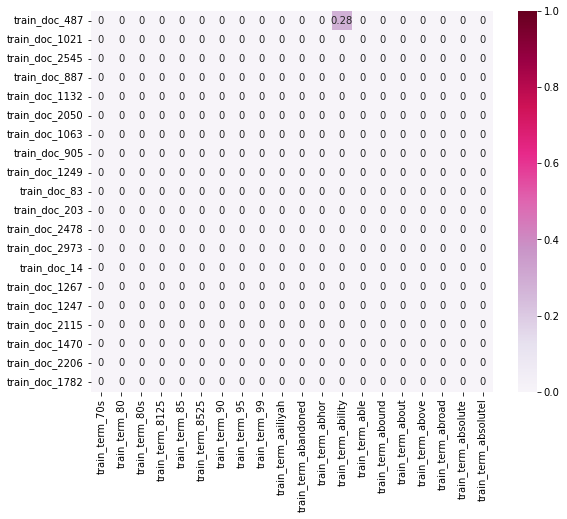

In [122]:
# train data visualization
plot_x = ["train_term_"+str(i) for i in vectorizer.get_feature_names_out()[50:70]]
plot_y = ["train_doc_"+ str(i) for i in list(X_train.index)[50:70]]
plot_z = tf_x[50:70, 50:70].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

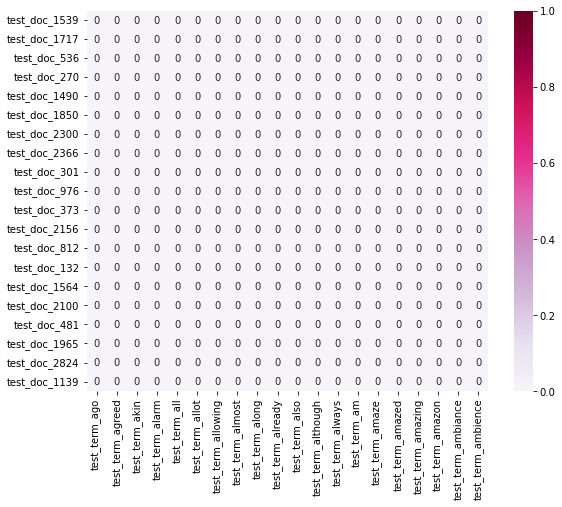

In [123]:
# data visualization
plot_x = ["test_term_"+str(i) for i in vectorizer_test.get_feature_names_out()[50:70]]
plot_y = ["test_doc_"+ str(i) for i in list(X_test.index)[50:70]]
plot_z = tf_x_test[50:70, 50:70].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

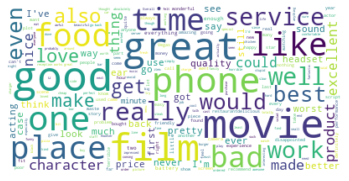

In [119]:
# wordcloud
text = " ".join(review for review in data['text'])
wordcloud = WordCloud(max_font_size=50, max_words=550, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [101]:
# use TFIDF feature train bayes
model = GaussianNB()
tf_x_test = vectorizer.transform(X_test)
model.fit(tf_x.toarray(),y_train)
y_pred = model.predict(tf_x_test.toarray())

print('TFIDF Accuracy:', accuracy_score(y_test, y_pred))
print('TFIDF F1 score:', f1_score(y_test, y_pred))
print('TFIDF Precision:', precision_score(y_test, y_pred))

TFIDF Accuracy: 0.7033333333333334
TFIDF F1 score: 0.6763636363636364
TFIDF Precision: 0.744


[[236  64]
 [114 186]]


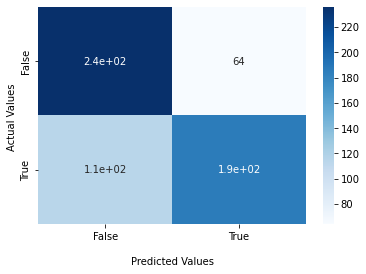

In [102]:
cm = contingency_matrix(y_test, y_pred)
print(cm)
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [103]:
# use word frequency train bayes
count_vectorizer = CountVectorizer()
train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)

model = GaussianNB()
model.fit(train_c.toarray(),y_train)
y_pred = model.predict(test_c.toarray())

print('word frequency Accuracy:', accuracy_score(y_test, y_pred))
print('word frequency F1 score:', f1_score(y_test, y_pred))
print('word frequency Precision:', precision_score(y_test, y_pred))

word frequency Accuracy: 0.7116666666666667
word frequency F1 score: 0.6490872210953347
word frequency Precision: 0.8290155440414507


[[267  33]
 [140 160]]


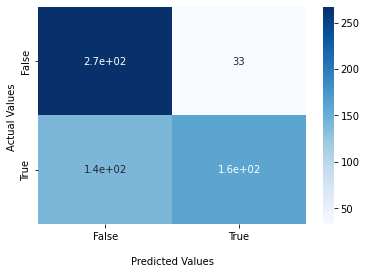

In [104]:
cm = contingency_matrix(y_test, y_pred)
print(cm)
conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()